In [3]:
using BSON
using DataFrames
using BlackBoxOptim
using Statistics
using PrettyTables
using Plots

In [4]:
true_pars = [-2.5, 1.5, -1.5, -.5, 3.5, 2.5, 1.5, -3, 3, -3.]

function res_fun(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)
    est = out["beta_hat"];

    fit = out["fitness"]
    if verbose==true
        for i = 1:size(est)[1]
            println(round.(est[i,:], digits=3),round.(fit[i], digits=2))
            sleep(0.5)
        end
    end


    bw = out["bw"]

    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
    m_h = mean(bw, dims=1)
    # println("True parameters: ", true_pars)
    # sleep(1)
#     println("Bias: ", round.(bias, digits=2))
    # sleep(1)
#     println("RMSE: ",round.(MSE, digits=2))
    # sleep(1)
#     println("Mean BW: ",round.(m_h, digits=2))
    pars10 = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10), bias, MSE, m_h 
    return est_df;
end
formatter = (v, i, j) -> round(v, digits = 2);

# 100 Replications


Number of firms = 100, number of simulations = 25 and 50 

In [5]:
path = "/Users/amir/out/02/est_100_sim_25.bson"; 
est_100_25, bias_100_25, RMSE_100_25, mean_bw_100_25 = res_fun(path, true_pars);
sample_id = rand(1:100, 10)
pretty_table(est_100_25[sample_id,:], formatters = formatter) # displaying 10 estimations
path = "/Users/amir/out/02/est_100_sim_50.bson"; 
est_100_50, bias_100_50, RMSE_100_50, mean_bw_100_50 = res_fun(path, true_pars);
pretty_table(est_100_50[sample_id,:], formatters = formatter) # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │   llike │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │   Float64 │  Float64 │     Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼─────────┤
│     -3.58 │     1.66 │     -1.41 │     -0.41 │      4.0 │     2.98 │     1.46 │     -3.34 │     0.88 │        -5.0 │    0.13 │
│     -3.53 │     1.71 │     -1.11 │     -0.23 │     3.53 │     3.64 │     1.18 │     -0.46 │     1.72 │       -4.57 │    0.54 │
│     -1.85 │     1.65 │     -2.04 │     -0.62 │     2.44 │     3.22 │     2.07 │     -2.02 │     1.89 │       -4.25 │     0.0 │
│     -2.93 │     1.32 │     -1.29 │     -0.44 │     3.56 │     2.17 │      1.3 │      1.95 │    

In [8]:
pretty_table(est_100_50, formatters = formatter); # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │   llike │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │   Float64 │  Float64 │     Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼─────────┤
│     -3.66 │     2.44 │     -1.13 │     -1.09 │     3.31 │      3.4 │     1.26 │      4.05 │      4.0 │       -3.11 │    0.24 │
│     -3.79 │      2.4 │     -0.94 │      -0.8 │     4.32 │     3.02 │     1.04 │     -1.64 │     1.26 │        -4.6 │   -0.05 │
│     -3.23 │     2.84 │     -0.81 │     -0.99 │     4.49 │      5.0 │     0.71 │     -0.22 │      0.8 │       -4.65 │    0.06 │
│     -4.99 │     2.52 │     -0.36 │     -1.04 │      5.0 │     2.85 │      0.5 │     -3.15 │    

In [ ]:
pretty_table(est_100_50, formatters = formatter); # displaying 10 estimations


In [10]:
path = "/Users/amir/out/03/03/est_200_sim_25.bson";
est_200_25, bias_200_25, RMSE_200_25, mean_bw_200_25 = res_fun(path, true_pars);
# sample_id
pretty_table(est_200_25[sample_id,:], formatters = formatter) # displaying 10 estimations


path = "/Users/amir/out/03/03/est_200_sim_50.bson";
est_200_50, bias_200_50, RMSE_200_50, mean_bw_200_50 = res_fun(path, true_pars);
# sample_id
pretty_table(est_200_50[sample_id,:], formatters = formatter) # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │   llike │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │   Float64 │  Float64 │     Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼─────────┤
│     -2.59 │     2.23 │     -1.53 │     -0.98 │     3.54 │     3.91 │     1.54 │      -2.7 │     1.68 │       -4.14 │   -0.12 │
│     -2.88 │     1.87 │     -1.35 │     -1.77 │     2.29 │     1.83 │     1.91 │      -3.5 │     2.39 │       -4.05 │    0.75 │
│     -2.71 │     2.76 │     -1.31 │     -1.41 │     2.91 │     3.76 │     1.44 │     -1.16 │     2.88 │       -3.12 │   -0.08 │
│     -2.25 │     2.31 │     -1.57 │     -1.01 │     3.75 │     4.07 │     1.47 │      -3.7 │    

# Bias

In [11]:
bias_mat = [hcat(bias_100_25, 100, 25); 
            hcat(bias_100_50, 100, 50); 
            hcat(bias_200_25, 200, 25); 
            hcat(bias_200_50, 200, 50)];
pars_nfirm_nsim = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
            "N", "S"];
bias_df_nfirm_nsim = DataFrame(bias_mat, pars_nfirm_nsim);
pretty_table(bias_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬─────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │       N │       S │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │   Float64 │  Float64 │     Float64 │ Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼─────────┼─────────┤
│     -0.72 │     0.64 │      0.31 │     -0.54 │     0.16 │     0.46 │     -0.2 │      2.54 │    -1.24 │       -1.24 │   100.0 │    25.0 │
│     -0.64 │     0.63 │      0.27 │     -0.45 │     0.23 │     0.63 │    -0.21 │      2.06 │    -1.37 │       -1.29 │   100.0 │    50.0 │
│     -0.32 │     0.95 │      0.08 │     -0.81 │    -0.18 │     1.28 │     0.04 │      0.59 │    -1.26 │       -0.99 │   200.0 │    25.0 │
│      -0.3 │     0.85 │   

# RMSE 

In [12]:
RMSE_mat = [hcat(RMSE_100_25, 100, 25); 
            hcat(RMSE_100_50, 100, 50); 
            hcat(RMSE_200_25, 200, 25); 
            hcat(RMSE_200_50, 200, 50)];
pars_nfirm_nsim = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
            "N", "S"];
RMSE_df_nfirm_nsim = DataFrame(RMSE_mat, pars_nfirm_nsim);
pretty_table(RMSE_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬─────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │       N │       S │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │   Float64 │  Float64 │     Float64 │ Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼─────────┼─────────┤
│      1.19 │     0.93 │      0.67 │      0.85 │      0.9 │     1.13 │     0.61 │      3.72 │     1.57 │        1.51 │   100.0 │    25.0 │
│      1.02 │     0.83 │      0.57 │      0.65 │     0.75 │     1.11 │     0.51 │      3.35 │     1.69 │        1.53 │   100.0 │    50.0 │
│      0.88 │     1.16 │       0.5 │      1.08 │     1.02 │     1.58 │     0.51 │      2.85 │     1.55 │        1.21 │   200.0 │    25.0 │
│      0.75 │     1.03 │   

# Expanding the search range to $(-10, 10)$

In [13]:
path = "/Users/amir/out/nosign/est_100_sim_25.bson"; 
est_100_25x, bias_100_25x, RMSE_100_25x, mean_bw_100_25x = res_fun(path, true_pars);
println("Search range (-5,5): ")
pretty_table(est_100_25[sample_id,:], formatters = formatter) # displaying 10 estimations
println("Search range (-10,10): ")
pretty_table(est_100_25x[sample_id,:], formatters = formatter) # displaying 10 estimations
push!(bias_df_nfirm_nsim, hcat(bias_100_25x, 25, 10099));
push!(RMSE_df_nfirm_nsim, hcat(RMSE_100_25x, 25, 10099));
println("Bias: ")
pretty_table(bias_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations

println("RMSE: ")
pretty_table(RMSE_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations


Search range (-5,5): 
┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │   llike │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │   Float64 │  Float64 │     Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼─────────┤
│     -3.58 │     1.66 │     -1.41 │     -0.41 │      4.0 │     2.98 │     1.46 │     -3.34 │     0.88 │        -5.0 │    0.13 │
│     -3.53 │     1.71 │     -1.11 │     -0.23 │     3.53 │     3.64 │     1.18 │     -0.46 │     1.72 │       -4.57 │    0.54 │
│     -1.85 │     1.65 │     -2.04 │     -0.62 │     2.44 │     3.22 │     2.07 │     -2.02 │     1.89 │       -4.25 │     0.0 │
│     -2.93 │     1.32 │     -1.29 │     -0.44 │     3.56 │     2.17 │     

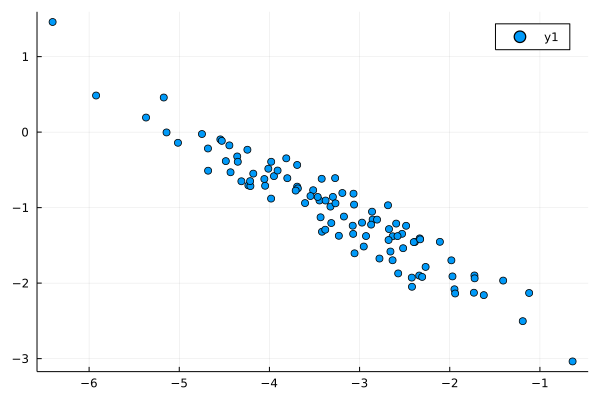

In [46]:
scatter(est_100_25x[:,1], est_100_25x[:,3])

In [38]:
pretty_table(cor(Matrix(est_100_25x)), formatters = formatter, show_row_number=true) # displaying 10 estimations



┌─────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬────────┬─────────┬─────────┐
│ Row │ Col. 1 │ Col. 2 │ Col. 3 │ Col. 4 │ Col. 5 │ Col. 6 │ Col. 7 │ Col. 8 │ Col. 9 │ Col. 10 │ Col. 11 │
├─────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼─────────┼─────────┤
│   1 │    1.0 │  -0.17 │  -0.95 │   0.16 │   -0.5 │   0.49 │   0.69 │   0.09 │  -0.22 │   -0.01 │   -0.28 │
│   2 │  -0.17 │    1.0 │    0.3 │   -0.9 │  -0.28 │   0.52 │   0.15 │   0.08 │  -0.02 │    0.09 │    0.33 │
│   3 │  -0.95 │    0.3 │    1.0 │  -0.27 │   0.46 │   -0.4 │  -0.67 │  -0.02 │   0.24 │    0.04 │     0.3 │
│   4 │   0.16 │   -0.9 │  -0.27 │    1.0 │   0.47 │  -0.27 │  -0.38 │   0.02 │   0.02 │    0.03 │   -0.51 │
│   5 │   -0.5 │  -0.28 │   0.46 │   0.47 │    1.0 │  -0.36 │  -0.79 │   0.22 │   0.13 │    0.22 │   -0.05 │
│   6 │   0.49 │   0.52 │   -0.4 │  -0.27 │  -0.36 │    1.0 │   0.29 │   0.22 │  -0.17 │    0.17 │    -0.2 │
│   7 │   0.69 │   

In [14]:
h_mat = zeros(27, 3)
scales = [0.5 1. 2.]
count = 1
for i1 = 1:3
    for i2 =  1:3
        for i3  = 1:3
            h_mat[count, :] = [scales[i1] scales[i2] scales[i3]]
            global count+=1
        end
    end
end



bias_mat = zeros(27, 13)
RMSE_mat = zeros(27, 13)
for h_id = 1:27
    path= "/Users/amir/out/h_vary1/est_100_sim_25_$(h_mat[h_id, 1])_$(h_mat[h_id, 2])_$(h_mat[h_id, 3]).bson";
#     path= "/Users/akp/out/h_vary1/est_100_sim_25_$(h_mat[h_id, 1])_$(h_mat[h_id, 2])_$(h_mat[h_id, 3]).bson"
    est, bias_mat[h_id,1:10], RMSE_mat[h_id, 1:10], h =  res_fun(path, true_pars);
    bias_mat[h_id, 11:13] = h; 
    RMSE_mat[h_id, 11:13] = h;
end


# Bias as a function of the bandwidths
The base line bandwidths are computed by minimizing the bcv2 criterion function. We then consider 27 vector of bandwidths that are all possible combinations of $0.5$, $1$, and $2$  multiples of the baseline bandwidths in each dimension. $N=100$ and $S=25$.  

In [153]:
col_names= ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", 
    "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
    "h_y1", "h_y2", "h_p"];
bias_df= DataFrame(bias_mat, col_names);
sort!(bias_df, ["h_y2", "h_p", "h_y1"])
# sort!(bias_df, ["h_y1", "h_p", "h_y2"])
pretty_table(bias_df, formatters = formatter)

┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────────┬─────────┬─────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ b33d=3.0 │ eqsel==-3.0 │    h_y1 │    h_y2 │     h_p │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │  Float64 │  Float64 │     Float64 │ Float64 │ Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────────┼─────────┼─────────┼─────────┤
│     -0.35 │     1.03 │      0.07 │     -0.73 │    -0.03 │     1.26 │     0.01 │     1.76 │    -0.86 │       -0.64 │    0.03 │    0.08 │    0.16 │
│     -0.63 │     0.87 │      0.08 │     -0.53 │     0.31 │     1.18 │    -0.03 │     0.85 │    -1.06 │       -0.54 │    0.06 │    0.08 │    0.16 │
│     -0.43 │     0.95 │      0.02 │     -0.62 │     0.27 │     1.18 │     0.18 │     0.98 │    -0.56 │         

In [148]:
col_names= ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", 
    "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", 
    "h_y1", "h_y2", "h_p"];
RMSE_df= DataFrame(RMSE_mat, col_names);

# sort!(RMSE_df, ["h_y2", "h_p", "h_y1"])
# sort!(RMSE_df, ["h_y1", "h_p", "h_y2"])



pretty_table(RMSE_df, formatters = formatter)

┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬───────────┬──────────┬─────────────┬─────────┬─────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=-3.0 │ b33d=3.0 │ eqsel==-3.0 │    h_y1 │    h_y2 │     h_p │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │   Float64 │  Float64 │     Float64 │ Float64 │ Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼───────────┼──────────┼─────────────┼─────────┼─────────┼─────────┤
│      0.86 │      1.2 │      0.56 │      0.97 │     0.89 │      1.5 │     0.55 │      3.72 │     1.44 │        1.18 │    0.03 │    0.08 │    0.16 │
│      0.98 │     0.86 │      0.54 │      0.64 │     0.74 │     1.03 │     0.47 │       3.7 │     1.56 │        1.63 │    0.03 │    0.08 │    0.32 │
│      0.88 │     0.61 │      0.51 │      0.52 │     0.77 │     0.95 │      0.5 │      3.67 │     1.83 │  

# Fixing the sign of $\beta_{13}^u$

In [149]:
function res_fun_b13(PATH, true_pars, verbose=:false)
    out = BSON.load(PATH)
    est = out["beta_hat"];
    est[:,8] = abs.(est[:,8])
    true_pars[8] = abs(true_pars[8])

    fit = out["fitness"]
    if verbose==true
        for i = 1:size(est)[1]
            println(round.(est[i,:], digits=3),round.(fit[i], digits=2))
            sleep(0.5)
        end
    end
    bw = out["bw"]
    bias = mean(est, dims=1) -true_pars'

    MSE = sqrt.(mean((est .- true_pars').^2, dims=1))
    m_h = mean(bw, dims=1)

    pars10 = ["b11u=$(true_pars[1])", "b12u=$(true_pars[2])", "b21u=$(true_pars[3])", "b22u=$(true_pars[4])", "b11d=$(true_pars[5])", 
            "b12d=$(true_pars[6])", "b21d=$(true_pars[7])", "b13u=$(true_pars[8])", "b33d=$(true_pars[9])", "eqsel==$(true_pars[10])", "llike"];
    est = hcat(est, fit);

    est_df = DataFrame(est, pars10), bias, MSE, m_h 
    return est_df;
end


path = "/Users/amir/out/sign/est_100_sim_25.bson"; 
est_100_25sign, bias_100_25sign, RMSE_100_25sign, mean_bw_100_25sign = res_fun_b13(path, true_pars);
pretty_table(est_100_25sign[sample_id,:], formatters = formatter) # displaying 10 estimations

push!(bias_df_nfirm_nsim, hcat(bias_100_25sign, 25, -10099));
push!(RMSE_df_nfirm_nsim, hcat(RMSE_100_25sign, 25, -10099));
println("Bias: ")
pretty_table(bias_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations

println("RMSE: ")
pretty_table(RMSE_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ b33d=3.0 │ eqsel==-3.0 │   llike │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │  Float64 │  Float64 │     Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────────┼─────────┤
│     -2.51 │     1.16 │     -1.89 │     -0.31 │     2.74 │      1.5 │     1.95 │      1.3 │    -2.22 │        -9.4 │    0.15 │
│     -5.47 │      1.5 │      0.06 │     -0.53 │     5.33 │     0.84 │     -0.0 │     1.02 │     2.93 │       -3.81 │    0.25 │
│     -2.41 │     2.38 │     -1.68 │     -1.02 │     3.02 │     4.32 │     1.71 │      0.3 │    -1.01 │       -6.74 │    0.28 │
│     -0.66 │     5.83 │     -2.38 │     -3.78 │     2.87 │     9.07 │      2.1 │      6.1 │     1.64 │ 

## Smaller Price Bandwidth

In [150]:

path = "/Users/amir/out/prbw/est_100_sim_25.bson"; 
est_100_25prbw, bias_100_25prbw, RMSE_100_25prbw, mean_bw_100_25prbw = res_fun_b13(path, true_pars);
pretty_table(est_100_25prbw[sample_id,:], formatters = formatter) # displaying 10 estimations

# push!(bias_df_nfirm_nsim, hcat(bias_100_25sign, 25, -10099));
# push!(RMSE_df_nfirm_nsim, hcat(RMSE_100_25sign, 25, -10099));
# println("Bias: ")
# pretty_table(bias_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations

# println("RMSE: ")
# pretty_table(RMSE_df_nfirm_nsim, formatters = formatter) # displaying 10 estimations


┌───────────┬──────────┬───────────┬───────────┬──────────┬──────────┬──────────┬──────────┬──────────┬─────────────┬─────────┐
│ b11u=-2.5 │ b12u=1.5 │ b21u=-1.5 │ b22u=-0.5 │ b11d=3.5 │ b12d=2.5 │ b21d=1.5 │ b13u=3.0 │ b33d=3.0 │ eqsel==-3.0 │   llike │
│   Float64 │  Float64 │   Float64 │   Float64 │  Float64 │  Float64 │  Float64 │  Float64 │  Float64 │     Float64 │ Float64 │
├───────────┼──────────┼───────────┼───────────┼──────────┼──────────┼──────────┼──────────┼──────────┼─────────────┼─────────┤
│     -5.88 │     4.12 │      1.56 │     -3.19 │     4.36 │     2.18 │     1.54 │     7.84 │     1.56 │       -4.56 │    1.36 │
│     -4.13 │     5.07 │     -0.24 │     -3.07 │      4.3 │     6.39 │     0.72 │      6.3 │     6.53 │         1.5 │    2.62 │
│     -2.45 │     3.72 │     -1.11 │     -1.24 │     6.94 │     7.34 │     1.28 │     1.17 │     9.57 │         6.9 │    1.08 │
│      1.54 │     3.96 │     -3.94 │      0.43 │     8.31 │     7.14 │     4.48 │     1.15 │    -8.85 │ 